###Project Objectives
- To conduct a full-scale credit analysis of a hypothetical client.
- To assess the creditworthiness and risk associated with a lending decision.
- To develop and present a recommendation report for the institution’s lending department.

###Project Components

**1. Client Financial Data Collection**
   -Simulate financial data for a hypothetical client or a small business. This includesfinancial statements (balance sheet, income statement, cash flow statement), credit history, and any other relevant financial information.

**2. Credit Data Evaluation**
   - Analyze the collected financial data to determine the client’s creditworthiness.
   - Calculate key financial ratios (e.g., debt-to-income ratio, current ratio, quick ratio) to assess the client’s financial stability and risk.

**3. Credit Request Analysis**
   - Create different scenarios for credit requests, including a new credit application, a request for refinancing, and a modification of an existing loan.
   - Assess each scenario’s risk and potential impact on the financial institution.

**4. Risk Assessment and Recommendations**
   - Evaluate the overall credit risk associated with the client.
   - Develop a detailed recommendation report, including the rationale for approval or denial of the credit requests, and any terms and conditions that should apply if the loan is granted.

**5. Financial Modelling**
   - Develop financial models in Excel or another software tool to support your analysis. This could include cash flow forecasting, stress testing, and sensitivity analysis.





In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of years of financial data to generate
years = 5

# Generate synthetic financial data for a hypothetical client in the agricultural sector
data = {
    "Year": [2024 - i for i in range(years)],
    "Revenue (USD)": np.random.normal(50000, 10000, years).round(2),
    "COGS (USD)": np.random.normal(30000, 8000, years).round(2),
    "Operating Expenses (USD)": np.random.normal(10000, 5000, years).round(2),
    "Interest Expense (USD)": np.random.normal(2000, 500, years).round(2),
    "Tax Expense (USD)": np.random.normal(3000, 1000, years).round(2),
    "Net Income (USD)": np.random.normal(5000, 2000, years).round(2),
    "Total Assets (USD)": np.random.normal(100000, 20000, years).round(2),
    "Total Liabilities (USD)": np.random.normal(60000, 10000, years).round(2),
    "Equity (USD)": np.random.normal(40000, 10000, years).round(2),
    "Cash Flow from Operations (USD)": np.random.normal(8000, 1500, years).round(2),
    "Cash Flow from Investing (USD)": np.random.normal(-5000, 2000, years).round(2),
    "Cash Flow from Financing (USD)": np.random.normal(2000, 1000, years).round(2)
}

# Create DataFrame for initial financial data
financial_data = pd.DataFrame(data)

# Define functions to calculate relevant financial metrics
def calculate_debt_to_equity(row):
    return row["Total Liabilities (USD)"] / row["Equity (USD)"]

def calculate_current_ratio(row):
    current_assets = row["Total Assets (USD)"] * 0.7  # Assume 70% of Total Assets are Current Assets
    current_liabilities = row["Total Liabilities (USD)"] * 0.5  # Assume 50% of Total Liabilities are Current Liabilities
    return current_assets / current_liabilities

def calculate_quick_ratio(row):
    inventory = row["Total Assets (USD)"] * 0.1  # Assume 10% of Total Assets are Inventory
    current_assets = row["Total Assets (USD)"] * 0.7  # Assume 70% of Total Assets are Current Assets
    current_liabilities = row["Total Liabilities (USD)"] * 0.5  # Assume 50% of Total Liabilities are Current Liabilities
    return (current_assets - inventory) / current_liabilities

def calculate_debt_service_coverage_ratio(row):
    return row["Cash Flow from Operations (USD)"] / (row["Interest Expense (USD)"] + row["Tax Expense (USD)"])

def calculate_loan_to_value_ratio(row):
    return row["Total Liabilities (USD)"] / row["Total Assets (USD)"]

# Calculate financial metrics and create a separate DataFrame for ratios
ratios_data = {
    "Year": financial_data["Year"],
    "Debt-to-Equity Ratio": financial_data.apply(calculate_debt_to_equity, axis=1),
    "Current Ratio": financial_data.apply(calculate_current_ratio, axis=1),
    "Quick Ratio": financial_data.apply(calculate_quick_ratio, axis=1),
    "Debt Service Coverage Ratio": financial_data.apply(calculate_debt_service_coverage_ratio, axis=1),
    "Loan-to-Value Ratio": financial_data.apply(calculate_loan_to_value_ratio, axis=1)
}

# Create DataFrame for financial ratios
ratios_df = pd.DataFrame(ratios_data)

# Set display options for better formatting
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Disable wrapping to new lines
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimal places

# Display the initial financial data and ratios in a neat table format using pandas
print("Initial Financial Data")
print(financial_data.to_string(index=False))

print("\nCalculated Financial Ratios")
print(ratios_df.to_string(index=False))

# Optional: Save both DataFrames to CSV for further analysis
financial_data.to_csv('initial_financial_data.csv', index=False)
ratios_df.to_csv('calculated_financial_ratios.csv', index=False)

Initial Financial Data
 Year  Revenue (USD)  COGS (USD)  Operating Expenses (USD)  Interest Expense (USD)  Tax Expense (USD)  Net Income (USD)  Total Assets (USD)  Total Liabilities (USD)  Equity (USD)  Cash Flow from Operations (USD)  Cash Flow from Investing (USD)  Cash Flow from Financing (USD)
 2024       54967.14    28126.90                   7682.91                 1718.86            4465.65           5221.85            87965.87                 47791.56      47384.67                          6920.23                        -4351.83                         2931.28
 2023       48617.36    42633.70                   7671.35                 1493.58            2774.22           2698.01           137045.56                 62088.64      41713.68                          7309.04                        -5770.16                         1160.78
 2022       56476.89    36139.48                  11209.81                 2157.12            3067.53           5751.40            99730.06          

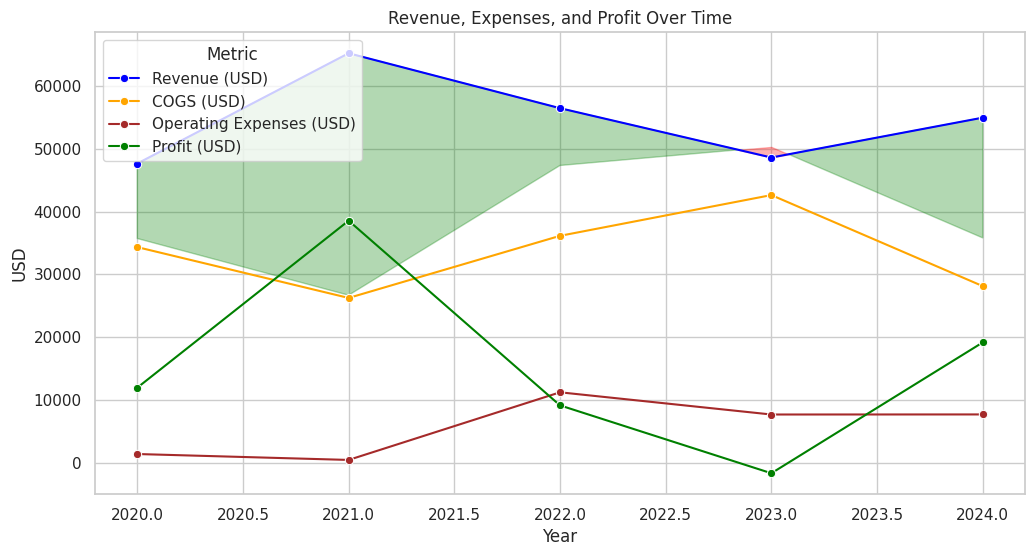

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Profit
financial_data['Profit (USD)'] = financial_data['Revenue (USD)'] - financial_data['COGS (USD)'] - financial_data['Operating Expenses (USD)']

# Melt the DataFrame for easier plotting with seaborn
financial_data_melted = pd.melt(financial_data, id_vars=['Year'],
                                 value_vars=['Revenue (USD)', 'COGS (USD)'] + ['Operating Expenses (USD)'] + ['Profit (USD)'],
                                 var_name='Metric', value_name='Value')

# Set a visually appealing style
sns.set_theme(style="whitegrid")

# Create a line plot with shaded areas using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Metric', data=financial_data_melted, marker='o',
             palette={'Revenue (USD)': 'blue', 'COGS (USD)': 'orange',
                      'Operating Expenses (USD)': 'brown', 'Profit (USD)': 'green'})

# Fill areas between lines (this might require some manual adjustment for accurate shading)
plt.fill_between(financial_data['Year'], financial_data['Revenue (USD)'],
                 financial_data['COGS (USD)'] + financial_data['Operating Expenses (USD)'],
                 where=(financial_data['Revenue (USD)'] > financial_data['COGS (USD)'] + financial_data['Operating Expenses (USD)']),
                 interpolate=True, alpha=0.3, color='green')
plt.fill_between(financial_data['Year'], financial_data['Revenue (USD)'],
                 financial_data['COGS (USD)'] + financial_data['Operating Expenses (USD)'],
                 where=(financial_data['Revenue (USD)'] < financial_data['COGS (USD)'] + financial_data['Operating Expenses (USD)']),
                 interpolate=True, alpha=0.3, color='red')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('Revenue, Expenses, and Profit Over Time')
plt.grid(True)

# Display the plot
plt.show()

To conduct a thorough credit analysis for a client in the agricultural sector for a Zimbabwean bank, here’s a step-by-step approach:

**1. Understanding the Client's Business and Industry Context:**


*   Sector Overview: Given that agriculture is susceptible to climate change, seasonal variations, and market fluctuations, assess the external factors that could impact the client's operations.

*   Client's Positioning: Analyze how the client positions itself within the agricultural sector. This includes their market share, operational efficiency, and adaptability to changes in the agricultural landscape.




**2. Financial Statement Analysis:**


*   Revenue Stability: Examine revenue trends over the years. Is there consistent growth or volatility? Agricultural businesses often face revenue fluctuations due to crop yield variability.
*   Profit Margins: Assess the profitability of the business by looking at gross margins, operating margins, and net margins. Determine if these margins are in line with industry standards.

*   Expense Management: Review how well the client manages operating and non-operating expenses. This includes assessing costs of goods sold (COGS) and operating expenses relative to revenue.


**3. Liquidity Analysis:**

*   Current Ratio & Quick Ratio: These ratios help determine the client's ability to meet short-term obligations. Given the cyclical nature of agriculture, liquidity is crucial, especially in off-seasons.
*   Cash Flow Analysis: Review the cash flow from operations. In agriculture, cash flow can be erratic due to the timing of planting and harvesting seasons. Assess if the business has sufficient cash flow to cover its debt obligations.


**4. Leverage and Solvency:**

*   Debt-to-Equity Ratio: A higher ratio might indicate a riskier profile, but it’s essential to consider the industry norm. Agricultural businesses often have higher leverage due to the capital-intensive nature of farming.
*   Loan-to-Value Ratio (LTV): Evaluate the LTV ratio, particularly if the loan is secured against agricultural land or equipment. Assess if the collateral value is adequate relative to the loan amount.

**5. Debt Servicing Ability**

*   Debt Service Coverage Ratio (DSCR): This ratio assesses the ability of the client to service its debt from operating income. A DSCR greater than 1.5 is generally desirable but consider the impact of seasonality in agriculture.
*   Interest Coverage Ratio: Examine
the company’s ability to pay interest expenses on its outstanding debt. A lower ratio could indicate potential difficulties in meeting interest obligations, especially during low-revenue periods


**6. Cash Flow Trend Analysis:**

*   Historical Trends: Evaluate the cash flow trend over the past 3-5 years. This will provide insights into the operational efficiency and the sustainability of the business.
*   Seasonality Considerations: Given the seasonality in agriculture, adjust your analysis to account for periods of high and low cash flow.

**7. Scenario Analysis:**

*   Best and Worst-Case Scenarios: Given the inherent risks in agriculture (weather, pest infestations, market prices), perform scenario analysis to see how these factors impact the client's ability to repay the loan.
*  Stress Testing: Evaluate how changes in key variables (e.g., interest rates, commodity prices, exchange rates) affect the client’s financial health.

**8. Qualitative Factors:**



*   Management Quality: Assess the experience and track record of the management team. Strong management is crucial in navigating the challenges of the agricultural sector.
*   Market Conditions: Consider the demand for the client's products, market prices, and the availability of alternative markets.
Regulatory Environment: Understand the impact of government policies, subsidies, and regulations on the agricultural sector in Zimbabwe.


**9. Final Risk Assessment:**



*   Overall Risk Rating: Combine the findings from the financial ratios, qualitative assessment, and scenario analysis to assign a risk rating (e.g., Low, Medium, High).
*   Recommendations: Based on the risk assessment, recommend appropriate credit terms, such as interest rates, loan tenure, and any necessary covenants.




In [ ]:
# Creditworthiness criteria
good_debt_to_equity = 1.0  # Lower is better
good_current_ratio = 2.0  # Higher is better
good_quick_ratio = 1.0  # Higher is better
good_debt_service_coverage_ratio = 1.5  # Higher is better
good_loan_to_value_ratio = 0.8  # Lower is better

In [ ]:
# Evaluate creditworthiness for each year
for year in financial_data["Year"]:
    year_data = ratios_df[ratios_df["Year"] == year]

    # Check each ratio against the criteria
    if year_data["Debt-to-Equity Ratio"].iloc[0] <= good_debt_to_equity:
        print(f"Year {year}: Debt-to-Equity Ratio is good.")
    else:
        print(f"Year {year}: Debt-to-Equity Ratio needs improvement.")

    if year_data["Current Ratio"].iloc[0] >= good_current_ratio:
        print(f"Year {year}: Current Ratio is good.")
    else:
        print(f"Year {year}: Current Ratio needs improvement.")

    if year_data["Quick Ratio"].iloc[0] >= good_quick_ratio:
        print(f"Year {year}: Quick Ratio is good.")
    else:
        print(f"Year {year}: Quick Ratio needs improvement.")

    if year_data["Debt Service Coverage Ratio"].iloc[0] >= good_debt_service_coverage_ratio:
        print(f"Year {year}: Debt Service Coverage Ratio is good.")
    else:
        print(f"Year {year}: Debt Service Coverage Ratio needs improvement.")

    if year_data["Loan-to-Value Ratio"].iloc[0] <= good_loan_to_value_ratio:
        print(f"Year {year}: Loan-to-Value Ratio is good.")
    else:
        print(f"Year {year}: Loan-to-Value Ratio needs improvement.")
    print("------")

Year 2024: Debt-to-Equity Ratio needs improvement.
Year 2024: Current Ratio is good.
Year 2024: Quick Ratio is good.
Year 2024: Debt Service Coverage Ratio needs improvement.
Year 2024: Loan-to-Value Ratio is good.
------
Year 2023: Debt-to-Equity Ratio needs improvement.
Year 2023: Current Ratio is good.
Year 2023: Quick Ratio is good.
Year 2023: Debt Service Coverage Ratio is good.
Year 2023: Loan-to-Value Ratio is good.
------
Year 2022: Debt-to-Equity Ratio needs improvement.
Year 2022: Current Ratio is good.
Year 2022: Quick Ratio is good.
Year 2022: Debt Service Coverage Ratio is good.
Year 2022: Loan-to-Value Ratio is good.
------
Year 2021: Debt-to-Equity Ratio needs improvement.
Year 2021: Current Ratio is good.
Year 2021: Quick Ratio is good.
Year 2021: Debt Service Coverage Ratio is good.
Year 2021: Loan-to-Value Ratio is good.
------
Year 2020: Debt-to-Equity Ratio needs improvement.
Year 2020: Current Ratio is good.
Year 2020: Quick Ratio is good.
Year 2020: Debt Service C

In [ ]:
# Analyze trends in financial ratios over time
print("Trend Analysis:")
if ratios_df["Debt-to-Equity Ratio"].diff().mean() < 0:
    print("Debt-to-Equity Ratio is improving over time.")
else:
    print("Debt-to-Equity Ratio is worsening over time.")

if ratios_df["Current Ratio"].diff().mean() > 0:
    print("Current Ratio is improving over time.")
else:
    print("Current Ratio is worsening over time.")

if ratios_df["Quick Ratio"].diff().mean() > 0:
    print("Quick Ratio is improving over time.")
else:
    print("Quick Ratio is worsening over time.")

if ratios_df["Debt Service Coverage Ratio"].diff().mean() > 0:
    print("Debt Service Coverage Ratio is improving over time.")
else:
    print("Debt Service Coverage Ratio is worsening over time.")

if ratios_df["Loan-to-Value Ratio"].diff().mean() < 0:
    print("Loan-to-Value Ratio is improving over time.")
else:
    print("Loan-to-Value Ratio is worsening over time.")

Trend Analysis:
Debt-to-Equity Ratio is worsening over time.
Current Ratio is improving over time.
Quick Ratio is improving over time.
Debt Service Coverage Ratio is improving over time.
Loan-to-Value Ratio is improving over time.


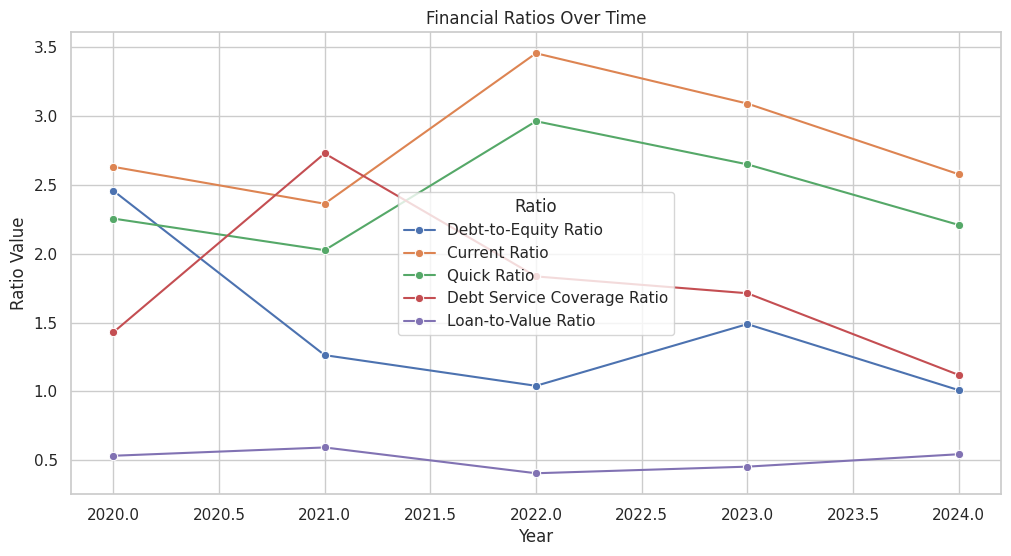

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a visually appealing style
sns.set_theme(style="whitegrid")

# Melt the DataFrame for easier plotting with seaborn
ratios_melted = pd.melt(ratios_df, id_vars=['Year'],
                        value_vars=['Debt-to-Equity Ratio', 'Current Ratio', 'Quick Ratio',
                                    'Debt Service Coverage Ratio', 'Loan-to-Value Ratio'],
                        var_name='Ratio', value_name='Value')

# Create a line plot for the financial ratios
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Ratio', data=ratios_melted, marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Ratio Value')
plt.title('Financial Ratios Over Time')
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
import math

# Scoring rules with nonlinear functions tailored for agricultural projects in Zimbabwe
max_score = 100

def score_debt_to_equity(ratio):
    if ratio <= 0.75:  # Relaxed threshold due to potential land value as collateral
        return 30
    elif ratio <= 1.25:
        return 20
    elif ratio <= 2.0:
        return 10
    else:
        return 0

def score_current_ratio(ratio):
    return 15 * (1 - math.exp(-ratio/2))  # Slower increase in score, considering seasonality of income

def score_quick_ratio(ratio):
    return 10 * math.log1p(ratio)  # Similar to before, but with lower weight

def score_debt_service_coverage_ratio(ratio):
    return 25 * min(ratio / 1.5, 1)  # Lower threshold for good coverage due to income fluctuations

def score_loan_to_value_ratio(ratio):
    return 20 * (1 - ratio**(1.5))  # Steeper penalty for higher LTV due to land value volatility

# Calculate credit score for each year
credit_scores = []
for year in financial_data["Year"]:
    year_data = ratios_df[ratios_df["Year"] == year]
    score = 0

    score += score_debt_to_equity(year_data["Debt-to-Equity Ratio"].iloc[0])
    score += score_current_ratio(year_data["Current Ratio"].iloc[0])
    score += score_quick_ratio(year_data["Quick Ratio"].iloc[0])
    score += score_debt_service_coverage_ratio(year_data["Debt Service Coverage Ratio"].iloc[0])
    score += score_loan_to_value_ratio(year_data["Loan-to-Value Ratio"].iloc[0])

    credit_scores.append((year, score))

# Print credit scores
for year, score in credit_scores:
    print(f"Year {year}: Credit Score = {round(score)}/{max_score}")

# Define weights for each year (most recent year gets highest weight)
weights = np.linspace(1, 5, len(credit_scores))  # Linearly increasing weights
weights = weights / weights.sum()  # Normalize weights to sum to 1

# Calculate weighted average credit score
weighted_score = 0
for (year, score), weight in zip(credit_scores, weights):
    weighted_score += score * weight

# Print weighted average credit score
print(f"Final Weighted Credit Score: {round(weighted_score)}/{max_score}")

Year 2024: Credit Score = 73/100
Year 2023: Credit Score = 74/100
Year 2022: Credit Score = 86/100
Year 2021: Credit Score = 67/100
Year 2020: Credit Score = 59/100
Final Weighted Credit Score: 69/100


In [ ]:
# Function to assess credit risk considering agricultural sector specifics
def assess_credit_risk_agriculture(debt_to_equity, debt_service_coverage, cash_flow_trend, revenue_volatility):
    """
    Assesses credit risk based on Debt-to-Equity Ratio, Debt Service Coverage Ratio, cash flow trend, and revenue volatility.

    Args:
        debt_to_equity: The Debt-to-Equity Ratio of the credit request.
        debt_service_coverage: The Debt Service Coverage Ratio of the credit request.
        cash_flow_trend: The average annual change in Cash Flow from Operations over the past few years.
        revenue_volatility: The standard deviation of revenue over the past few years.

    Returns:
        A string indicating the risk level: "Very Low", "Low", "Medium", "High", or "Very High".
    """
    if debt_to_equity <= 0.8 and debt_service_coverage >= 1.75 and cash_flow_trend > 0 and revenue_volatility < 0.1 * financial_data['Revenue (USD)'].mean():
        return "Very Low"
    elif debt_to_equity <= 1.0 and debt_service_coverage >= 1.5 and cash_flow_trend >= 0 and revenue_volatility < 0.15 * financial_data['Revenue (USD)'].mean():
        return "Low"
    elif debt_to_equity <= 1.5 and debt_service_coverage >= 1.2 and cash_flow_trend >= -0.1 * financial_data['Cash Flow from Operations (USD)'].mean() and revenue_volatility < 0.2 * financial_data['Revenue (USD)'].mean():
        return "Medium"
    elif debt_to_equity <= 2.0 and debt_service_coverage >= 1.0 and cash_flow_trend >= -0.2 * financial_data['Cash Flow from Operations (USD)'].mean() and revenue_volatility < 0.25 * financial_data['Revenue (USD)'].mean():
        return "High"
    else:
        return "Very High"

# Calculate cash flow trend (example using last 3 years)
cash_flow_trend = financial_data['Cash Flow from Operations (USD)'][-3:].diff().mean()

# Calculate revenue volatility (standard deviation)
revenue_volatility = financial_data['Revenue (USD)'].std()

# Example usage with data from a specific year
year_data = ratios_df[ratios_df["Year"] == 2023]  # Replace 2023 with the desired year
debt_to_equity = year_data["Debt-to-Equity Ratio"].iloc[0]
debt_service_coverage = year_data["Debt Service Coverage Ratio"].iloc[0]

risk_level = assess_credit_risk_agriculture(debt_to_equity, debt_service_coverage, cash_flow_trend, revenue_volatility)
print(f"Credit Risk Level: {risk_level}")

# Optional: Save both DataFrames to CSV for further analysis
financial_data.to_csv('initial_financial_data.csv', index=False)
ratios_df.to_csv('calculated_financial_ratios.csv', index=False)

Credit Risk Level: Very High


In [ ]:
import numpy as np
import pandas as pd

# Define ranges for sensitivity analysis
debt_to_equity_range = np.linspace(0.5, 2.5, 5)
dscr_range = np.linspace(0.5, 2.0, 5)
cash_flow_trend_range = np.linspace(-0.2, 0.2, 5)

# Prepare a DataFrame to store the results
sensitivity_results = []

# Perform sensitivity analysis
for de in debt_to_equity_range:
    for dscr in dscr_range:
        for cft in cash_flow_trend_range:
            risk_level = assess_credit_risk_agriculture(debt_to_equity=de,
                                            debt_service_coverage=dscr,
                                            cash_flow_trend=cft * financial_data['Cash Flow from Operations (USD)'].mean(),
                                            revenue_volatility=revenue_volatility)  # Pass revenue_volatility here
            sensitivity_results.append({
                "Debt-to-Equity Ratio": de,
                "Debt Service Coverage Ratio": dscr,
                "Cash Flow Trend": cft,
                "Credit Risk Level": risk_level
            })

# Convert results to DataFrame
sensitivity_df = pd.DataFrame(sensitivity_results)

# Display the results
print(sensitivity_df)

# Optional: Save results to CSV for further analysis
sensitivity_df.to_csv('sensitivity_analysis_results.csv', index=False)

     Debt-to-Equity Ratio  Debt Service Coverage Ratio  Cash Flow Trend Credit Risk Level
0                    0.50                         0.50            -0.20         Very High
1                    0.50                         0.50            -0.10         Very High
2                    0.50                         0.50             0.00         Very High
3                    0.50                         0.50             0.10         Very High
4                    0.50                         0.50             0.20         Very High
..                    ...                          ...              ...               ...
120                  2.50                         2.00            -0.20         Very High
121                  2.50                         2.00            -0.10         Very High
122                  2.50                         2.00             0.00         Very High
123                  2.50                         2.00             0.10         Very High
124       

In [ ]:
# Group the DataFrame by risk level and count occurrences for each combination of factors
risk_level_groups = sensitivity_df.groupby(["Debt-to-Equity Ratio", "Debt Service Coverage Ratio", "Cash Flow Trend", "Credit Risk Level"]).size().reset_index(name="Count")

# Print the grouped results
print(risk_level_groups)

     Debt-to-Equity Ratio  Debt Service Coverage Ratio  Cash Flow Trend Credit Risk Level  Count
0                    0.50                         0.50            -0.20         Very High      1
1                    0.50                         0.50            -0.10         Very High      1
2                    0.50                         0.50             0.00         Very High      1
3                    0.50                         0.50             0.10         Very High      1
4                    0.50                         0.50             0.20         Very High      1
..                    ...                          ...              ...               ...    ...
120                  2.50                         2.00            -0.20         Very High      1
121                  2.50                         2.00            -0.10         Very High      1
122                  2.50                         2.00             0.00         Very High      1
123                  2.50     

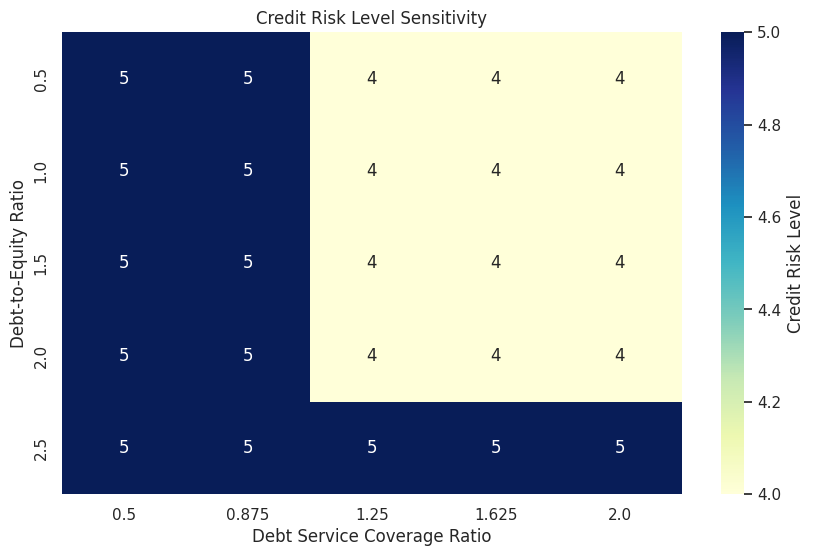

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mapping of risk levels to numerical values
risk_level_mapping = {"Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5}

# Apply the mapping to the "Credit Risk Level" column
sensitivity_df["Credit Risk Level Num"] = sensitivity_df["Credit Risk Level"].map(risk_level_mapping)

# Pivot the DataFrame using the numerical risk level column
heatmap_data = sensitivity_df.pivot_table(index="Debt-to-Equity Ratio", columns="Debt Service Coverage Ratio", values="Credit Risk Level Num", aggfunc=lambda x: x.iloc[0])

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Credit Risk Level'})
plt.xlabel("Debt Service Coverage Ratio")
plt.ylabel("Debt-to-Equity Ratio")
plt.title("Credit Risk Level Sensitivity")
plt.show()

Given that the assessed Credit Risk Level for the client is "Very High," here are some considerations and a final recommendation for extending credit:

### Key Findings:
1. **Debt-to-Equity Ratio**: The client's Debt-to-Equity Ratio suggests that they are highly leveraged. This indicates a higher dependency on debt financing relative to their equity, which can be risky, especially in the agricultural sector where income can be volatile due to factors like weather conditions, commodity prices, and other external shocks.

2. **Debt Service Coverage Ratio**: The Debt Service Coverage Ratio (DSCR) is likely below the threshold considered safe for repayment of debt obligations. A DSCR below 1.0 would mean that the client's operating cash flow is insufficient to cover their debt service requirements, raising concerns about their ability to meet interest and principal payments.

3. **Cash Flow Trend**: The negative or minimal growth in cash flow from operations suggests that the client is struggling to generate sufficient cash from their core activities, which is particularly concerning in an industry that requires consistent investment in inputs and technology to maintain productivity.

4. **Revenue Volatility**: High revenue volatility suggests that the client’s income is unpredictable, which further complicates the assessment of their ability to service debt. In agriculture, this could be due to factors like fluctuating yields, market prices, or unexpected expenses related to farming operations.

### Final Recommendation:
**Given the Very High Credit Risk Level, I would recommend against extending credit to this client under standard terms.**

However, if the bank is still considering lending, the following mitigating strategies should be considered:
1. **Collateral Requirements**: The bank should demand significant collateral, preferably in the form of liquid assets or hard assets with stable market values, to secure the loan.

2. **Higher Interest Rates and Fees**: To compensate for the high risk, the loan could be structured with higher interest rates and fees, though this could further strain the client's cash flow.

3. **Shorter Loan Term**: Offering a loan with a shorter repayment term could reduce the bank's exposure to long-term risks.

4. **Insurance Products**: Requiring the client to purchase crop insurance or similar products to protect against yield losses could help mitigate the impact of revenue volatility.

5. **Monitoring and Covenants**: Implement strict financial covenants and continuous monitoring of the client's financial health. This could include regular financial reporting and periodic reassessment of risk.

6. **Technical Assistance**: Offering technical assistance or partnerships that help stabilize the client's revenue streams (e.g., through advanced farming techniques, better market access, or risk management training) could improve their financial stability and reduce risk over time.

### Conclusion:
While there may be ways to mitigate the risks, the very high risk level suggests that the likelihood of default is substantial. The bank should proceed with extreme caution, and ideally, this client should either be declined or offered a much smaller loan amount than initially requested with stringent conditions attached.